In [12]:
pip install openpyxl


  Using cached et_xmlfile-1.1.0-py3-none-any.whl.metadata (1.8 kB)
   ---------------------------------------- 0.0/251.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/251.3 kB ? eta -:--:--
   --------- ------------------------------ 61.4/251.3 kB ? eta -:--:--
   -------------- ------------------------- 92.2/251.3 kB 1.3 MB/s eta 0:00:01
   ----------------- ---------------------- 112.6/251.3 kB 1.1 MB/s eta 0:00:01
   ------------------ ------------------- 122.9/251.3 kB 901.1 kB/s eta 0:00:01
   ------------------------ ------------- 163.8/251.3 kB 898.2 kB/s eta 0:00:01
   ----------------------------- -------- 194.6/251.3 kB 845.5 kB/s eta 0:00:01
   ------------------------------ ------- 204.8/251.3 kB 831.5 kB/s eta 0:00:01
   -------------------------------------  245.8/251.3 kB 838.1 kB/s eta 0:00:01
   -------------------------------------- 251.3/251.3 kB 772.8 kB/s eta 0:00:00
Using cached et_xmlfile-1.1.0-py3-none-any.whl (4.7 kB)
Note: you may need to re

In [5]:
import os
import itertools
from Levenshtein import distance
import pandas as pd

def find_related_files(folders):
    related_files = {os.path.basename(folder): [] for folder in folders}

    for folder1, folder2 in itertools.combinations(folders, 2):
        try:
            files1 = os.listdir(folder1)
        except OSError as e:
            print(f"Error accessing folder {folder1}: {e}")
            continue

        try:
            files2 = os.listdir(folder2)
        except OSError as e:
            print(f"Error accessing folder {folder2}: {e}")
            continue

        for file1 in files1:
            for file2 in files2:
                # Calculate Levenshtein distance between file names
                dist = distance(file1.lower(), file2.lower())
                # Adjust the threshold as needed
                if dist < 5:  # Adjust the threshold as needed
                    related_files[os.path.basename(folder1)].append(file1)
                    related_files[os.path.basename(folder2)].append(file2)

    # Find the maximum length among all lists
    max_length = max(len(files) for files in related_files.values())
    # Pad each list with empty strings to match the maximum length
    for files in related_files.values():
        files.extend([''] * (max_length - len(files)))

    return related_files

# Specify the folders you want to compare
folders = [
    'C:/xampp/htdocs/migration_campus/RDF_BF',
    'C:/xampp/htdocs/migration_campus/RDF_BVO',
    'C:/xampp/htdocs/migration_campus/RDF_JSON',
    'C:/xampp/htdocs/migration_campus/RDF_JS_OBJ',
    'C:/xampp/htdocs/migration_campus/RDF_UI'
]

related_files = find_related_files(folders)

# Create a DataFrame with folders as columns and related files as rows
df = pd.DataFrame(related_files)

# Transpose the DataFrame to have folders as rows and related files as columns
df = df.transpose()

print(df)


                                0                    1   \
RDF_BF       candidateResultBF.php   DriveDetailsBF.php   
RDF_BVO     candidateResultBVO.php  DriveDetailsBVO.php   
RDF_JSON                                                  
RDF_JS_OBJ                                                
RDF_UI       candidateResultUI.php   DriveDetailsUI.php   

                               2                  3                       4   \
RDF_BF       forgetPasswordBF.php     HRScreenBF.php       loginScreenBF.php   
RDF_BVO     forgetPasswordBVO.php    HRscreenBVO.php      loginScreenBVO.php   
RDF_JSON                                                                       
RDF_JS_OBJ                                                                     
RDF_UI        fogetPasswordUI.php  loginScreenUI.php  PrinciDrivesDoneUI.php   

                                   5                        6   \
RDF_BF       PrinciDriveDetailsBF.php   PrinciDrivesDoneBF.php   
RDF_BVO     PrinciDriveDetialsBV

In [9]:
import os
import itertools
from Levenshtein import distance
import pandas as pd
from tabulate import tabulate

def find_related_files(folders):
    related_files = {os.path.basename(folder): [] for folder in folders}

    for folder1, folder2 in itertools.combinations(folders, 2):
        try:
            files1 = os.listdir(folder1)
        except OSError as e:
            print(f"Error accessing folder {folder1}: {e}")
            continue

        try:
            files2 = os.listdir(folder2)
        except OSError as e:
            print(f"Error accessing folder {folder2}: {e}")
            continue

        for file1 in files1:
            for file2 in files2:
                # Calculate Levenshtein distance between file names
                dist = distance(file1.lower(), file2.lower())
                # Adjust the threshold as needed
                if dist < 10:  # Adjust the threshold as needed
                    related_files[os.path.basename(folder1)].append(file1)
                    related_files[os.path.basename(folder2)].append(file2)

    # Find the maximum length among all lists
    max_length = max(len(files) for files in related_files.values())
    # Pad each list with empty strings to match the maximum length
    for files in related_files.values():
        files.extend([''] * (max_length - len(files)))

    return related_files

# Specify the folders you want to compare
folders = [
    'C:/xampp/htdocs/migration_campus/RDF_BF',
    'C:/xampp/htdocs/migration_campus/RDF_BVO',
    'C:/xampp/htdocs/migration_campus/RDF_JSON',
    'C:/xampp/htdocs/migration_campus/RDF_JS_OBJ',
    'C:/xampp/htdocs/migration_campus/RDF_UI'
]

related_files = find_related_files(folders)

# Create a DataFrame with folders as columns and related files as rows
df = pd.DataFrame(related_files)

# Transpose the DataFrame to have folders as rows and related files as columns


# Print the table
print(tabulate(df, headers='keys', tablefmt='grid'))


+-----+-----------------------------------+----------------------------+-------------------------------------+-------------------------------------+----------------------------------+
|     | RDF_BF                            | RDF_BVO                    | RDF_JSON                            | RDF_JS_OBJ                          | RDF_UI                           |
+=====+===================================+============================+=====================================+=====================================+==================================+
|   0 | candidateResultBF.php             | candidateResultBVO.php     | candidateResultData.json            | DriveDetailsAction.js               | candidateResultUI.php            |
+-----+-----------------------------------+----------------------------+-------------------------------------+-------------------------------------+----------------------------------+
|   1 | candidateResultBF.php             | updateTheResultBVO.php     | DriveDe

In [13]:
import os
import itertools
from Levenshtein import distance
import pandas as pd

def find_related_files(folders):
    related_files = {os.path.basename(folder): [] for folder in folders}

    for folder1, folder2 in itertools.combinations(folders, 2):
        try:
            files1 = os.listdir(folder1)
        except OSError as e:
            print(f"Error accessing folder {folder1}: {e}")
            continue

        try:
            files2 = os.listdir(folder2)
        except OSError as e:
            print(f"Error accessing folder {folder2}: {e}")
            continue

        for file1 in files1:
            for file2 in files2:
                # Calculate Levenshtein distance between file names
                dist = distance(file1.lower(), file2.lower())
                # Adjust the threshold as needed
                if dist < 10:  # Adjust the threshold as needed
                    related_files[os.path.basename(folder1)].append(file1)
                    related_files[os.path.basename(folder2)].append(file2)

    # Find the maximum length among all lists
    max_length = max(len(files) for files in related_files.values())
    # Pad each list with empty strings to match the maximum length
    for files in related_files.values():
        files.extend([''] * (max_length - len(files)))

    return related_files

# Specify the folders you want to compare
folders = [
    'C:/xampp/htdocs/migration_campus/RDF_BF',
    'C:/xampp/htdocs/migration_campus/RDF_BVO',
    'C:/xampp/htdocs/migration_campus/RDF_JSON',
    'C:/xampp/htdocs/migration_campus/RDF_JS_OBJ',
    'C:/xampp/htdocs/migration_campus/RDF_UI'
]

related_files = find_related_files(folders)

# Create a DataFrame with folders as columns and related files as rows
df = pd.DataFrame(related_files)

# Transpose the DataFrame to have folders as rows and related files as columns

# Save the DataFrame as an Excel file
df.to_excel('related_files.xlsx')


In [1]:
import os
import pandas as pd

# Define the base folder path
base_path = 'C:\\xampp\\htdocs\\migration_campus'

# Define the folder paths relative to the base path
folder_paths = {
    'RDF_BF': os.path.join(base_path, 'RDF_BF'),
    'RDF_BVO': os.path.join(base_path, 'RDF_BVO'),
    'RDF_JSON': os.path.join(base_path, 'RDF_JSON'),
    'RDF_JS_OBJ': os.path.join(base_path, 'RDF_JS_OBJ'),
    'RDF_UI': os.path.join(base_path, 'RDF_UI')
}

# Initialize a dictionary to hold filenames
folders = {}

# Load filenames from the folders
for folder, path in folder_paths.items():
    # List all files in the directory
    files = os.listdir(path)
    # Filter out only files (exclude directories)
    files = [f for f in files if os.path.isfile(os.path.join(path, f))]
    # Store the filenames in the dictionary
    folders[folder] = files

# Finding the maximum number of files in any folder
max_files = max(len(files) for files in folders.values())

# Creating a DataFrame
data = {}
for folder, files in folders.items():
    # Extend the list of files to the max_files length by adding empty strings
    extended_files = files + [''] * (max_files - len(files))
    data[folder] = extended_files

df = pd.DataFrame(data)

# Export to CSV (optional)
df.to_csv('organized_files.csv', index=False)

# Print the DataFrame
print(df)


                              RDF_BF                     RDF_BVO  \
0              candidateResultBF.php      candidateResultBVO.php   
1                 DriveDetailsBF.php         DriveDetailsBVO.php   
2                 eligibleCandBF.php   EligibleCandidatesBVO.php   
3               forgetPasswordBF.php         feedbackFormBVO.php   
4                     HRScreenBF.php       forgetPasswordBVO.php   
5                  loginScreenBF.php             HRscreenBVO.php   
6                loginVolunteers.php          loginScreenBVO.php   
7           PrinciDriveDetailsBF.php   PrinciDriveDetialsBVO.php   
8             PrinciDrivesDoneBF.php     PrinciDrivesDoneBVO.php   
9                  PrinciOptedBF.php     PrinciJSONReaderBVO.php   
10                PrinciPlacedBF.php          PrinciOptedBVO.php   
11              PrinciUnplacedBF.php         PrinciPlacedBVO.php   
12               Registration_BF.php       PrinciUnplacedBVO.php   
13  updateAptitudeResultScreenBF.php        Regi

In [2]:
import os
import pandas as pd

# Define the base folder path
base_path = 'C:\\xampp\\htdocs\\migration_campus'

# Define the folder paths relative to the base path
folder_paths = {
    'RDF_BF': os.path.join(base_path, 'RDF_BF'),
    'RDF_BVO': os.path.join(base_path, 'RDF_BVO'),
    'RDF_JSON': os.path.join(base_path, 'RDF_JSON'),
    'RDF_JS_OBJ': os.path.join(base_path, 'RDF_JS_OBJ'),
    'RDF_UI': os.path.join(base_path, 'RDF_UI')
}

# Initialize a dictionary to hold filenames
folders = {}

# Load filenames from the folders
for folder, path in folder_paths.items():
    # List all files in the directory
    if os.path.exists(path):
        files = os.listdir(path)
        # Filter out only files (exclude directories)
        files = [f for f in files if os.path.isfile(os.path.join(path, f))]
    else:
        files = []
    # Store the filenames in the dictionary
    folders[folder] = files

# Finding the maximum number of files in any folder
max_files = max(len(files) for files in folders.values())

# Creating a DataFrame
data = {}
for folder, files in folders.items():
    # Extend the list of files to the max_files length by adding None
    extended_files = files + [None] * (max_files - len(files))
    data[folder] = extended_files

df = pd.DataFrame(data)

# Export to CSV (optional)
df.to_csv('organized_files.csv', index=False)

# Print the DataFrame
print(df)


                              RDF_BF                     RDF_BVO  \
0              candidateResultBF.php      candidateResultBVO.php   
1                 DriveDetailsBF.php         DriveDetailsBVO.php   
2                 eligibleCandBF.php   EligibleCandidatesBVO.php   
3               forgetPasswordBF.php         feedbackFormBVO.php   
4                     HRScreenBF.php       forgetPasswordBVO.php   
5                  loginScreenBF.php             HRscreenBVO.php   
6                loginVolunteers.php          loginScreenBVO.php   
7           PrinciDriveDetailsBF.php   PrinciDriveDetialsBVO.php   
8             PrinciDrivesDoneBF.php     PrinciDrivesDoneBVO.php   
9                  PrinciOptedBF.php     PrinciJSONReaderBVO.php   
10                PrinciPlacedBF.php          PrinciOptedBVO.php   
11              PrinciUnplacedBF.php         PrinciPlacedBVO.php   
12               Registration_BF.php       PrinciUnplacedBVO.php   
13  updateAptitudeResultScreenBF.php        Regi

In [3]:
import os
import pandas as pd

# Define the base folder path
base_path = 'C:\\xampp\\htdocs\\migration_campus'

# Define the folder paths relative to the base path
folder_paths = {
    'RDF_BF': os.path.join(base_path, 'RDF_BF'),
    'RDF_BVO': os.path.join(base_path, 'RDF_BVO'),
    'RDF_JSON': os.path.join(base_path, 'RDF_JSON'),
    'RDF_JS_OBJ': os.path.join(base_path, 'RDF_JS_OBJ'),
    'RDF_UI': os.path.join(base_path, 'RDF_UI')
}

# Initialize a dictionary to hold filenames
folders = {}

# Load filenames from the folders
for folder, path in folder_paths.items():
    # List all files in the directory
    files = os.listdir(path)
    # Filter out only files (exclude directories)
    files = [f for f in files if os.path.isfile(os.path.join(path, f))]
    # Store the filenames in the dictionary
    folders[folder] = files

# Create a DataFrame
max_files = max(len(files) for files in folders.values())
data = {folder: [''] * max_files for folder in folder_paths.keys()}  # Initialize with empty strings

for folder, files in folders.items():
    for idx, file_name in enumerate(files):
        data[folder][idx] = file_name

df = pd.DataFrame(data)

# Export to CSV (optional)
df.to_csv('organized_files.csv', index=False)

# Print the DataFrame
print(df)


                    RDF_BF               RDF_BVO  \
0    candidateResultBF.php   loginVolunteers.php   
1       DriveDetailsBF.php     PrinciOptedBF.php   
2     forgetPasswordBF.php    PrinciPlacedBF.php   
3           HRScreenBF.php  PrinciUnplacedBF.php   
4        loginScreenBF.php      volunteersBF.php   
..                     ...                   ...   
102                   None                  None   
103                   None                  None   
104                   None                  None   
105                   None                  None   
106                   None                  None   

                              RDF_JS_OBJ                           Others  \
0       updateAptitudeResultScreenBF.php            candidateResultBF.php   
1             updateHRResultScreenBF.php               DriveDetailsBF.php   
2            updateTechnicalResultBF.php               eligibleCandBF.php   
3    updateAptitudeResultScreenData.json             forgetPassword

In [5]:
import os
import pandas as pd

# Define the base folder path
base_path = 'C:\\xampp\\htdocs\\migration_campus'

# Define the folder paths relative to the base path
folder_paths = {
    'RDF_BF': os.path.join(base_path, 'RDF_BF'),
    'RDF_BVO': os.path.join(base_path, 'RDF_BVO'),
    'RDF_JSON': os.path.join(base_path, 'RDF_JSON'),
    'RDF_JS_OBJ': os.path.join(base_path, 'RDF_JS_OBJ'),
    'RDF_UI': os.path.join(base_path, 'RDF_UI')
}

# Initialize a dictionary to hold filenames
folders = {}

# Load filenames from the folders
for folder, path in folder_paths.items():
    # List all files in the directory
    files = os.listdir(path)
    # Filter out only files (exclude directories)
    files = [f for f in files if os.path.isfile(os.path.join(path, f))]
    # Store the filenames in the dictionary
    folders[folder] = files

# Create a DataFrame
max_files = max(len(files) for files in folders.values())
data = {folder: [''] * max_files for folder in folder_paths.keys()}  # Initialize with empty strings

for folder, files in folders.items():
    for idx, file_name in enumerate(files):
        data[folder][idx] = file_name

df = pd.DataFrame(data)

# Export to CSV (optional)
df.to_csv('organized_files.csv', index=False)

# Print the DataFrame
print(df)


                              RDF_BF                     RDF_BVO  \
0              candidateResultBF.php      candidateResultBVO.php   
1                 DriveDetailsBF.php         DriveDetailsBVO.php   
2                 eligibleCandBF.php   EligibleCandidatesBVO.php   
3               forgetPasswordBF.php         feedbackFormBVO.php   
4                     HRScreenBF.php       forgetPasswordBVO.php   
5                  loginScreenBF.php             HRscreenBVO.php   
6                loginVolunteers.php          loginScreenBVO.php   
7           PrinciDriveDetailsBF.php   PrinciDriveDetialsBVO.php   
8             PrinciDrivesDoneBF.php     PrinciDrivesDoneBVO.php   
9                  PrinciOptedBF.php     PrinciJSONReaderBVO.php   
10                PrinciPlacedBF.php          PrinciOptedBVO.php   
11              PrinciUnplacedBF.php         PrinciPlacedBVO.php   
12               Registration_BF.php       PrinciUnplacedBVO.php   
13  updateAptitudeResultScreenBF.php        Regi

In [6]:
import os
import pandas as pd
import numpy as np

# Define the base folder path
base_path = 'C:\\xampp\\htdocs\\migration_campus'

# Define the folder paths relative to the base path
folder_paths = {
    'RDF_BF': os.path.join(base_path, 'RDF_BF'),
    'RDF_BVO': os.path.join(base_path, 'RDF_BVO'),
    'RDF_JSON': os.path.join(base_path, 'RDF_JSON'),
    'RDF_JS_OBJ': os.path.join(base_path, 'RDF_JS_OBJ'),
    'RDF_UI': os.path.join(base_path, 'RDF_UI')
}

# Initialize a dictionary to hold filenames
folders = {}

# Load filenames from the folders
for folder, path in folder_paths.items():
    # List all files in the directory
    files = os.listdir(path)
    # Filter out only files (exclude directories)
    files = [f for f in files if os.path.isfile(os.path.join(path, f))]
    # Store the filenames in the dictionary
    folders[folder] = files

# Create a DataFrame
max_files = max(len(files) for files in folders.values())
data = {folder: [''] * max_files for folder in folder_paths.keys()}  # Initialize with empty strings

for folder, files in folders.items():
    for idx, file_name in enumerate(files): 
        data[folder][idx] = file_name

df = pd.DataFrame(data)

# Replace empty strings with NaN
df.replace('', np.nan, inplace=True)

# Export to CSV (optional)
df.to_csv('organized_files.csv', index=False)

# Print the DataFrame
print(df)


                              RDF_BF                     RDF_BVO  \
0              candidateResultBF.php      candidateResultBVO.php   
1                 DriveDetailsBF.php         DriveDetailsBVO.php   
2                 eligibleCandBF.php   EligibleCandidatesBVO.php   
3               forgetPasswordBF.php         feedbackFormBVO.php   
4                     HRScreenBF.php       forgetPasswordBVO.php   
5                  loginScreenBF.php             HRscreenBVO.php   
6                loginVolunteers.php          loginScreenBVO.php   
7           PrinciDriveDetailsBF.php   PrinciDriveDetialsBVO.php   
8             PrinciDrivesDoneBF.php     PrinciDrivesDoneBVO.php   
9                  PrinciOptedBF.php     PrinciJSONReaderBVO.php   
10                PrinciPlacedBF.php          PrinciOptedBVO.php   
11              PrinciUnplacedBF.php         PrinciPlacedBVO.php   
12               Registration_BF.php       PrinciUnplacedBVO.php   
13  updateAptitudeResultScreenBF.php        Regi

In [8]:
import openpyxl

folders = {
    'RDF_BF': [
        'candidateResultBF.php', 'DriveDetailsBF.php', 'eligibleCandBF.php', 'forgetPasswordBF.php',
        'HRScreenBF.php', 'loginScreenBF.php', 'loginVolunteers.php', 'PrinciDriveDetailsBF.php',
        'PrinciDrivesDoneBF.php', 'PrinciOptedBF.php', 'PrinciPlacedBF.php', 'PrinciUnplacedBF.php',
        'Registration_BFO.php', 'updateAptitudeResultScreenBFO.php', 'updateHRResultScreenBFO.php',
        'updateTechnicalResultBFO.php', 'volunteersBF.php'
    ],
    'RDF_BVO': [
        'candidateResultBVO.php', 'DriveDetailsBVO.php', 'EligibleCandidatesBVO.php', 'feedbackFormBVO.php',
        'forgetPasswordBVO.php', 'HRscreenBVO.php', 'loginScreenBVO.php', 'PrinciDriveDetialsBVO.php',
        'PrinciDrivesDoneBVO.php', 'PrinciJSONReaderBVO.php', 'PrinciOptedBVO.php', 'PrinciPlacedBVO.php',
        'PrinciUnplacedBVO.php', 'Registration_BVO.php', 'upcomingDriveScreenBVO.php', 'updateTheResultBVO.php',
        'ViewDriveBVO.php', 'viewFeedbackBVO.php', 'viewResultScreenBVO.php', 'volunteersBVO.php'
    ],
    'RDF_JSON': [
        'aptitudePassedStudents.json', 'candidateResultData.json', 'DriveDetailsData.json', 'EligibleCandidates.json',
        'feedbackFormData.json', 'HRData.json', 'HRPassedStudents.json', 'princiData.json', 'profiledata.json',
        'registerDirectoryData.json', 'Registration_Data.json', 'technicalPassedStudents.json',
        'upcomingDriveScreenData.json', 'updateAptitudeResultScreenData.json', 'updateHRResultScreenData.json',
        'updateTechnicalResultData.json', 'ViewAptitudeResultScreenData.json', 'ViewDriveData.json',
        'viewFeedbackData.json', 'viewHRResultScreenData.json', 'viewTechnicalResultScreenData.json', 'volunteersdata.json'
    ],
    'RDF_JS_OBJ': [
        'candidateScreenAction.js', 'DriveDetailsAction.js', 'feedbackFormAction.js', 'forgetPasswordAction.js',
        'HRHomeScreenAction.js', 'HRscreenAction.js', 'loginScreenAction.js', 'princiAction.js',
        'PrinciDrivesDoneAction.js', 'RegistrationAction.js', 'roomAvailabilityAction.js', 'TpoHomeScreenAction.js',
        'upcomingDriveScreenAction.js', 'updateAptitudeResultScreenAction.js', 'updateHRResultScreenAction.js',
        'updateTechnicalResultAction.js', 'viewDriveAction.js', 'VolnteerScreenAction.js', 'VolunteerAction.js'
    ],
    'RDF_UI': [
        'candidateResultUI.php', 'DriveDetailsUI.php', 'eligiblescreenUI.php', 'feedbackFormUI.php',
        'fogetPasswordUI.php', 'HRContactScreenUI.php', 'HRHomeScreenUI.php', 'loginScreenUI.php',
        'PrinciDrivesDoneUI.php', 'PrinciOptedUI.php', 'PrinciPlacedUI.php', 'PrinciScreenUI.php',
        'PrinciUnplacedUI.php', 'PrinciUpcomingUI.php', 'RegistrationUI.php', 'roomAvailabilityUI.php',
        'TpoHomeScreenUI.php', 'upcomingDriveScreenUI.php', 'updateAptitudeResultScreenUI.php',
        'updateHRResultScreenUI.php', 'updateTechnicalResultUI.php', 'updateTheResultUI.php',
        'ViewAptitudeResultScreenUI.php', 'ViewDriveUI.php', 'viewFeedbackUI.php', 'viewHRResultScreenUI.php',
        'viewResultScreenUI.php', 'viewTechnicalResultScreenUI.php', 'VolunteerScreenUI.php', 'VolunteerUI.php'
    ]
}

functions = [
    "Candidate Result", "Drive Details", "Eligible Candidates", "Forget Password", "HR Screen", "Login",
    "Principal", "Registration", "Result Update", "Upcoming Drive", "Volunteers", "Feedback",
    "View Drive", "View Result", "View Feedback", "Room Availability", "TPO Home Screen", "Profile Data"
]

# Create a new Excel workbook
workbook = openpyxl.Workbook()
sheet = workbook.active

# Write the header row
header = ["Function"] + list(folders.keys())
sheet.append(header)

# Write the data rows
for func in functions:
    row = [func]
    for folder in folders:
        if any(f.startswith(func.replace(' ', '')) for f in folders[folder]):
            row.append(', '.join([f for f in folders[folder] if f.startswith(func.replace(' ', ''))]))
        else:
            row.append('null')
    sheet.append(row)

# Save the Excel file
workbook.save('file_table.xlsx')
print("Excel file saved as 'file_table.xlsx'.")

Excel file saved as 'file_table.xlsx'.


In [10]:
import openpyxl

# Data for the table
data = [
    ["Function", "RDF_BF", "RDF_BVO", "RDF_JSON", "RDF_JS_OBJ", "RDF_UI"],
    ["Candidate Result", "candidateResultBF.php", "candidateResultBVO.php", "candidateResultData.json", "candidateScreenAction.js", "candidateResultUI.php"],
    ["Drive Details", "DriveDetailsBF.php", "DriveDetailsBVO.php", "DriveDetailsData.json", "DriveDetailsAction.js", "DriveDetailsUI.php"],
    ["Eligible Candidates", "eligibleCandBF.php", "EligibleCandidatesBVO.php", "EligibleCandidates.json", "null", "eligiblescreenUI.php"],
    ["Forget Password", "forgetPasswordBF.php", "forgetPasswordBVO.php", "null", "forgetPasswordAction.js", "fogetPasswordUI.php"],
    ["HR Screen", "HRScreenBF.php", "HRscreenBVO.php", "HRData.json, HRPassedStudents.json", "HRHomeScreenAction.js, HRscreenAction.js", "HRContactScreenUI.php, HRHomeScreenUI.php"],
    ["Login", "loginScreenBF.php, loginVolunteers.php", "loginScreenBVO.php", "null", "loginScreenAction.js", "loginScreenUI.php"],
    ["Principal", "PrinciDriveDetailsBF.php, PrinciDrivesDoneBF.php, PrinciOptedBF.php, PrinciPlacedBF.php, PrinciUnplacedBF.php", "PrinciDriveDetialsBVO.php, PrinciDrivesDoneBVO.php, PrinciJSONReaderBVO.php, PrinciOptedBVO.php, PrinciPlacedBVO.php, PrinciUnplacedBVO.php", "princiData.json", "princiAction.js, PrinciDrivesDoneAction.js", "PrinciDrivesDoneUI.php, PrinciOptedUI.php, PrinciPlacedUI.php, PrinciScreenUI.php, PrinciUnplacedUI.php, PrinciUpcomingUI.php"],
    ["Registration", "Registration_BFO.php", "Registration_BVO.php", "registerDirectoryData.json, Registration_Data.json", "RegistrationAction.js", "RegistrationUI.php"],
    ["Result Update", "updateAptitudeResultScreenBFO.php, updateHRResultScreenBFO.php, updateTechnicalResultBFO.php", "updateTheResultBVO.php", "updateAptitudeResultScreenData.json, updateHRResultScreenData.json, updateTechnicalResultData.json", "updateAptitudeResultScreenAction.js, updateHRResultScreenAction.js, updateTechnicalResultAction.js", "updateAptitudeResultScreenUI.php, updateHRResultScreenUI.php, updateTechnicalResultUI.php, updateTheResultUI.php"],
    ["Upcoming Drive", "null", "upcomingDriveScreenBVO.php", "upcomingDriveScreenData.json", "upcomingDriveScreenAction.js", "upcomingDriveScreenUI.php"],
    ["Volunteers", "volunteersBF.php", "volunteersBVO.php", "volunteersdata.json", "VolnteerScreenAction.js, VolunteerAction.js", "VolunteerScreenUI.php, VolunteerUI.php"],
    ["Feedback", "null", "feedbackFormBVO.php", "feedbackFormData.json", "feedbackFormAction.js", "feedbackFormUI.php"],
    ["View Drive", "null", "ViewDriveBVO.php", "ViewDriveData.json", "viewDriveAction.js", "ViewDriveUI.php"],
    ["View Result", "null", "viewResultScreenBVO.php", "ViewAptitudeResultScreenData.json, viewHRResultScreenData.json, viewTechnicalResultScreenData.json", "null", "ViewAptitudeResultScreenUI.php, viewHRResultScreenUI.php, viewResultScreenUI.php, viewTechnicalResultScreenUI.php"],
    ["View Feedback", "null", "viewFeedbackBVO.php", "viewFeedbackData.json", "null", "viewFeedbackUI.php"],
    ["Room Availability", "null", "null", "null", "roomAvailabilityAction.js", "roomAvailabilityUI.php"],
    ["TPO Home Screen", "null", "null", "null", "TpoHomeScreenAction.js", "TpoHomeScreenUI.php"],
    ["Profile Data", "null", "null", "profiledata.json", "null", "null"]
]

# Create a new Excel workbook
workbook = openpyxl.Workbook()
sheet = workbook.active

# Write the data to the worksheet
for row in data:
    sheet.append(row)

# Save the Excel file
workbook.save("file_table.xlsx")
print("Excel file saved as 'file_table.xlsx'.")

Excel file saved as 'file_table.xlsx'.


In [1]:
import openpyxl
import os

# Set the root directory
root_dir = r"C:\xampp\htdocs\migration_campus"

folders = {}
for dirname, _, filenames in os.walk(root_dir):
    relative_dir = os.path.relpath(dirname, root_dir)
    if relative_dir != ".":
        folder_name = os.path.basename(relative_dir)
        folders[folder_name] = [os.path.join(relative_dir, f) for f in filenames]

# Create a new Excel workbook
workbook = openpyxl.Workbook()
sheet = workbook.active

# Write the header row
header = list(folders.keys())
sheet.append(header)

# Write the data rows
for folder in folders:
    row = []
    for file_path in folders[folder]:
        row.append(os.path.basename(file_path))
    sheet.append(row)

# Save the Excel file
workbook.save('file_table.xlsx')
print("Excel file saved as 'file_table.xlsx'.")

Excel file saved as 'file_table.xlsx'.


ValueError: Each row in 'cellText' must have 3 columns

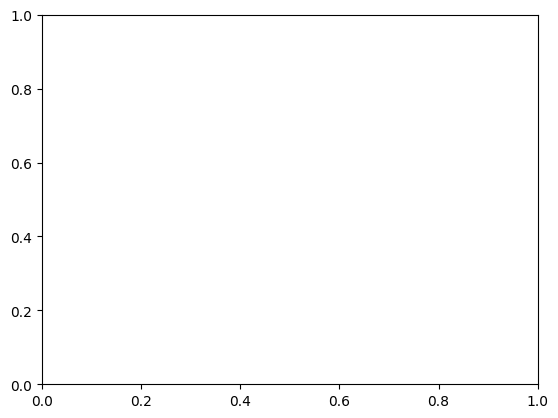

In [2]:
import matplotlib.pyplot as plt

# Sample data
folders = ['Folder1', 'Folder2', 'Folder3']
files = [['file1', 'file2', 'file3'], ['file4', 'file5'], ['file6', 'file7', 'file8', 'file9']]

# Create the table
fig, ax = plt.subplots()
ax.table(cellText=files, colLabels=folders, loc='center')

# Hide the axes
ax.axis('off')

# Show the plot
plt.show()

In [4]:
import os

# Define an empty dictionary to store the files
files = {}

# Iterate over the files and subfolders in the specified directory
for root, dirs, file_list in os.walk('C:\\xampp\\htdocs\\migration_campus'):
    for file in file_list:
        # Get the first name of the file (without extension)
        first_name = os.path.splitext(file)[0].split('_')[0]
        
        # Add the file to the dictionary
        if first_name in files:
            files[first_name].append(os.path.join(root, file))
        else:
            files[first_name] = [os.path.join(root, file)]

# Print the grouped files
for first_name, file_list in files.items():
    print(f"First Name: {first_name}")
    print("Files:")
    for file in file_list:
        print(f"  {file}")
    print()

First Name: RDFView
Files:
  C:\xampp\htdocs\migration_campus\RDFView.php

First Name: candidateResultBF
Files:
  C:\xampp\htdocs\migration_campus\RDF_BF\candidateResultBF.php

First Name: DriveDetailsBF
Files:
  C:\xampp\htdocs\migration_campus\RDF_BF\DriveDetailsBF.php

First Name: eligibleCandBF
Files:
  C:\xampp\htdocs\migration_campus\RDF_BF\eligibleCandBF.php

First Name: forgetPasswordBF
Files:
  C:\xampp\htdocs\migration_campus\RDF_BF\forgetPasswordBF.php

First Name: HRScreenBF
Files:
  C:\xampp\htdocs\migration_campus\RDF_BF\HRScreenBF.php

First Name: loginScreenBF
Files:
  C:\xampp\htdocs\migration_campus\RDF_BF\loginScreenBF.php

First Name: loginVolunteers
Files:
  C:\xampp\htdocs\migration_campus\RDF_BF\loginVolunteers.php

First Name: PrinciDriveDetailsBF
Files:
  C:\xampp\htdocs\migration_campus\RDF_BF\PrinciDriveDetailsBF.php

First Name: PrinciDrivesDoneBF
Files:
  C:\xampp\htdocs\migration_campus\RDF_BF\PrinciDrivesDoneBF.php

First Name: PrinciOptedBF
Files:
  C:\x

In [2]:
import os
from collections import defaultdict

# Define the directory path using raw string literal
directory = r"C:\xampp\htdocs\RDF_STUDIO\RDF_studio\migration_campus"

# Initialize a defaultdict to store files based on their extensions
files_by_extension = defaultdict(list)

# Iterate over each file in the directory
for root, _, files in os.walk(directory):
    for file in files:
        # Extract the file extension
        _, extension = os.path.splitext(file)
        # Append the file to the list corresponding to its extension
        files_by_extension[extension].append(os.path.join(root, file))

# Print the files grouped by their extensions
for extension, files in files_by_extension.items():
    print(f"Files with extension '{extension}':")
    for file in files:
        print(f"- {file}")
    print()

Files with extension '.php':
- C:\xampp\htdocs\RDF_STUDIO\RDF_studio\migration_campus\RDFView.php
- C:\xampp\htdocs\RDF_STUDIO\RDF_studio\migration_campus\RDF_BF\candidateResultBF.php
- C:\xampp\htdocs\RDF_STUDIO\RDF_studio\migration_campus\RDF_BF\DriveDetailsBF.php
- C:\xampp\htdocs\RDF_STUDIO\RDF_studio\migration_campus\RDF_BF\eligibleCandBF.php
- C:\xampp\htdocs\RDF_STUDIO\RDF_studio\migration_campus\RDF_BF\forgetPasswordBF.php
- C:\xampp\htdocs\RDF_STUDIO\RDF_studio\migration_campus\RDF_BF\HRScreenBF.php
- C:\xampp\htdocs\RDF_STUDIO\RDF_studio\migration_campus\RDF_BF\loginScreenBF.php
- C:\xampp\htdocs\RDF_STUDIO\RDF_studio\migration_campus\RDF_BF\loginVolunteers.php
- C:\xampp\htdocs\RDF_STUDIO\RDF_studio\migration_campus\RDF_BF\PrinciDriveDetailsBF.php
- C:\xampp\htdocs\RDF_STUDIO\RDF_studio\migration_campus\RDF_BF\PrinciDrivesDoneBF.php
- C:\xampp\htdocs\RDF_STUDIO\RDF_studio\migration_campus\RDF_BF\PrinciOptedBF.php
- C:\xampp\htdocs\RDF_STUDIO\RDF_studio\migration_campus\RDF_B

In [4]:
import os
from collections import defaultdict

# Define the directory path
directory = r"C:\xampp\htdocs\RDF_STUDIO\RDF_studio\migration_campus"


# Initialize defaultdicts to store files based on their extensions
php_files = defaultdict(list)
json_files = defaultdict(list)

# Iterate over each file in the directory
for root, _, files in os.walk(directory):
    for file in files:
        # Extract the file extension
        _, extension = os.path.splitext(file)
        # Append the file to the list corresponding to its extension
        if extension == '.php':
            php_files[extension].append(os.path.join(root, file))
        elif extension == '.json':
            json_files[extension].append(os.path.join(root, file))

# Determine the maximum number of files for alignment
max_length = max(len(php_files['.php']), len(json_files['.json']))

# Print the table headers
print("| PHP Files | JSON Files |")
print("|-----------|------------|")

# Print the table rows
for i in range(max_length):
    php_file = php_files['.php'][i] if i < len(php_files['.php']) else ''
    json_file = json_files['.json'][i] if i < len(json_files['.json']) else ''
    print(f"| {php_file} | {json_file} |")


| PHP Files | JSON Files |
|-----------|------------|
| C:\xampp\htdocs\RDF_STUDIO\RDF_studio\migration_campus\RDFView.php | C:\xampp\htdocs\RDF_STUDIO\RDF_studio\migration_campus\RDF_JSON\candidateResultData.json |
| C:\xampp\htdocs\RDF_STUDIO\RDF_studio\migration_campus\RDF_BF\candidateResultBF.php | C:\xampp\htdocs\RDF_STUDIO\RDF_studio\migration_campus\RDF_JSON\DriveDetailsData.json |
| C:\xampp\htdocs\RDF_STUDIO\RDF_studio\migration_campus\RDF_BF\DriveDetailsBF.php | C:\xampp\htdocs\RDF_STUDIO\RDF_studio\migration_campus\RDF_JSON\EligibleCandidates.json |
| C:\xampp\htdocs\RDF_STUDIO\RDF_studio\migration_campus\RDF_BF\eligibleCandBF.php | C:\xampp\htdocs\RDF_STUDIO\RDF_studio\migration_campus\RDF_JSON\feedbackFormData.json |
| C:\xampp\htdocs\RDF_STUDIO\RDF_studio\migration_campus\RDF_BF\forgetPasswordBF.php | C:\xampp\htdocs\RDF_STUDIO\RDF_studio\migration_campus\RDF_JSON\HRData.json |
| C:\xampp\htdocs\RDF_STUDIO\RDF_studio\migration_campus\RDF_BF\HRScreenBF.php | C:\xampp\htdoc

In [5]:
import os
from collections import defaultdict

# Define the directory path
directory = r"C:\xampp\htdocs\RDF_STUDIO\RDF_studio\migration_campus"


# Initialize a defaultdict to store files based on their names
file_names = defaultdict(list)

# Iterate over each file in the directory
for root, _, files in os.walk(directory):
    for file in files:
        # Extract the file name without extension
        file_name, extension = os.path.splitext(file)
        # Append the file to the list corresponding to its name
        file_names[file_name].append((extension, os.path.join(root, file)))

# Print the table headers
print("| File Name | PHP File | JSON File |")
print("|-----------|----------|-----------|")

# Print the table rows
for file_name, files in file_names.items():
    php_file = next((file for ext, file in files if ext == '.php'), '')
    json_file = next((file for ext, file in files if ext == '.json'), '')
    print(f"| {file_name} | {php_file} | {json_file} |")


| File Name | PHP File | JSON File |
|-----------|----------|-----------|
| RDFView | C:\xampp\htdocs\RDF_STUDIO\RDF_studio\migration_campus\RDFView.php |  |
| candidateResultBF | C:\xampp\htdocs\RDF_STUDIO\RDF_studio\migration_campus\RDF_BF\candidateResultBF.php |  |
| DriveDetailsBF | C:\xampp\htdocs\RDF_STUDIO\RDF_studio\migration_campus\RDF_BF\DriveDetailsBF.php |  |
| eligibleCandBF | C:\xampp\htdocs\RDF_STUDIO\RDF_studio\migration_campus\RDF_BF\eligibleCandBF.php |  |
| forgetPasswordBF | C:\xampp\htdocs\RDF_STUDIO\RDF_studio\migration_campus\RDF_BF\forgetPasswordBF.php |  |
| HRScreenBF | C:\xampp\htdocs\RDF_STUDIO\RDF_studio\migration_campus\RDF_BF\HRScreenBF.php |  |
| loginScreenBF | C:\xampp\htdocs\RDF_STUDIO\RDF_studio\migration_campus\RDF_BF\loginScreenBF.php |  |
| loginVolunteers | C:\xampp\htdocs\RDF_STUDIO\RDF_studio\migration_campus\RDF_BF\loginVolunteers.php |  |
| PrinciDriveDetailsBF | C:\xampp\htdocs\RDF_STUDIO\RDF_studio\migration_campus\RDF_BF\PrinciDriveDetails

In [6]:
import os
from collections import defaultdict

# Define the directory path
directory = r"C:\xampp\htdocs\RDF_STUDIO\RDF_studio\migration_campus"


# Initialize defaultdicts to store files based on their first two words
php_files = defaultdict(list)
json_files = defaultdict(list)

# Function to extract the first two words of a filename
def get_first_two_words(filename):
    words = filename.split('_')
    if len(words) >= 2:
        return '_'.join(words[:2])
    else:
        return filename

# Iterate over each file in the directory
for root, _, files in os.walk(directory):
    for file in files:
        # Extract the first two words of the filename
        first_two_words = get_first_two_words(file)
        # Append the file to the list corresponding to its first two words
        _, extension = os.path.splitext(file)
        if extension == '.php':
            php_files[first_two_words].append(os.path.join(root, file))
        elif extension == '.json':
            json_files[first_two_words].append(os.path.join(root, file))

# Print the table
print("| PHP Files | JSON Files |")
print("|-----------|------------|")
# Merge the keys to get all unique keys
keys = set(list(php_files.keys()) + list(json_files.keys()))
for key in keys:
    php_file = ', '.join(php_files[key]) if key in php_files else ''
    json_file = ', '.join(json_files[key]) if key in json_files else ''
    print(f"| {php_file} | {json_file} |")


| PHP Files | JSON Files |
|-----------|------------|
| C:\xampp\htdocs\RDF_STUDIO\RDF_studio\migration_campus\RDFView.php |  |
| C:\xampp\htdocs\RDF_STUDIO\RDF_studio\migration_campus\RDF_UI\HRContactScreenUI.php |  |
| C:\xampp\htdocs\RDF_STUDIO\RDF_studio\migration_campus\RDF_UI\PrinciUnplacedUI.php |  |
|  | C:\xampp\htdocs\RDF_STUDIO\RDF_studio\migration_campus\RDF_JSON\viewTechnicalResultScreenData.json |
| C:\xampp\htdocs\RDF_STUDIO\RDF_studio\migration_campus\RDF_BVO\forgetPasswordBVO.php |  |
|  | C:\xampp\htdocs\RDF_STUDIO\RDF_studio\migration_campus\RDF_JSON\viewFeedbackData.json |
| C:\xampp\htdocs\RDF_STUDIO\RDF_studio\migration_campus\RDF_UI\VolunteerUI.php |  |
| C:\xampp\htdocs\RDF_STUDIO\RDF_studio\migration_campus\RDF_UI\loginScreenUI.php |  |
|  | C:\xampp\htdocs\RDF_STUDIO\RDF_studio\migration_campus\RDF_JSON\Registration_Data.json |
| C:\xampp\htdocs\RDF_STUDIO\RDF_studio\migration_campus\RDF_BF\updateHRResultScreenBF.php |  |
|  | C:\xampp\htdocs\RDF_STUDIO\RDF_st

In [7]:
import os
from collections import defaultdict

# Define the directory path
directory = r"C:\xampp\htdocs\RDF_STUDIO\RDF_studio\migration_campus"


# Initialize defaultdict to store files based on their folder names
files_by_folder = defaultdict(list)

# Iterate over each file in the directory
for root, _, files in os.walk(directory):
    # Extract the folder name
    folder_name = os.path.basename(root)
    # Append the files to the list corresponding to their folder
    for file in files:
        files_by_folder[folder_name].append(os.path.join(root, file))

# Print the table headers
print("| Folder Name | Files |")
print("|-------------|-------|")

# Print the table rows
for folder, files in files_by_folder.items():
    # Print folder name
    print(f"| {folder} | ", end='')
    # Print files in the folder
    for file in files:
        print(f"{file}, ", end='')
    print("|")


| Folder Name | Files |
|-------------|-------|
| migration_campus | C:\xampp\htdocs\RDF_STUDIO\RDF_studio\migration_campus\RDFView.php, |
| RDF_BF | C:\xampp\htdocs\RDF_STUDIO\RDF_studio\migration_campus\RDF_BF\candidateResultBF.php, C:\xampp\htdocs\RDF_STUDIO\RDF_studio\migration_campus\RDF_BF\DriveDetailsBF.php, C:\xampp\htdocs\RDF_STUDIO\RDF_studio\migration_campus\RDF_BF\eligibleCandBF.php, C:\xampp\htdocs\RDF_STUDIO\RDF_studio\migration_campus\RDF_BF\forgetPasswordBF.php, C:\xampp\htdocs\RDF_STUDIO\RDF_studio\migration_campus\RDF_BF\HRScreenBF.php, C:\xampp\htdocs\RDF_STUDIO\RDF_studio\migration_campus\RDF_BF\loginScreenBF.php, C:\xampp\htdocs\RDF_STUDIO\RDF_studio\migration_campus\RDF_BF\loginVolunteers.php, C:\xampp\htdocs\RDF_STUDIO\RDF_studio\migration_campus\RDF_BF\PrinciDriveDetailsBF.php, C:\xampp\htdocs\RDF_STUDIO\RDF_studio\migration_campus\RDF_BF\PrinciDrivesDoneBF.php, C:\xampp\htdocs\RDF_STUDIO\RDF_studio\migration_campus\RDF_BF\PrinciOptedBF.php, C:\xampp\htdocs\RDF_

In [13]:
import os

# Directory path
directory = "C:/xampp/htdocs/RDF_STUDIO/RDF_studio/migration_campus"

# Initialize an empty dictionary to store folder names and their files
folders = {}

# Iterate through the directory
for folder in os.listdir(directory):
    folder_path = os.path.join(directory, folder)
    if os.path.isdir(folder_path):  # Check if it's a directory
        folders[folder] = os.listdir(folder_path)

# Print the table header
print("| Files                                      |", end="")
for folder in folders:
    print(f" {folder.ljust(9)} |", end="")
print()
print("|--------------------------------------------|", end="")
for _ in folders:
    print("-----------|", end="")
print()

# Determine the maximum number of files among all folders
max_files = max(len(files) for files in folders.values())

# Iterate over files and print rows
for i in range(max_files):
    row = "|"
    for folder, files in folders.items():
        if i < len(files):
            row += files[i].ljust(42) + "|"
        else:
            row += "null".ljust(42) + "|"
    print(row)


| Files                                      | RDF_BF    | RDF_BVO   | RDF_JSON  | RDF_JS_OBJ | RDF_UI    |
|--------------------------------------------|-----------|-----------|-----------|-----------|-----------|
|candidateResultBF.php                     |null                                      |candidateResultData.json                  |candidateScreenAction.js                  |DriveDetailsUI.php                        |
|DriveDetailsBF.php                        |null                                      |null                                      |DriveDetailsAction.js                     |null                                      |


In [14]:
import os

# Directory path
directory = "C:/xampp/htdocs/RDF_STUDIO/RDF_studio/migration_campus"

# Initialize an empty dictionary to store folder names and their files
folders = {}

# Iterate through the directory
for folder in os.listdir(directory):
    folder_path = os.path.join(directory, folder)
    if os.path.isdir(folder_path):  # Check if it's a directory
        files = os.listdir(folder_path)
        # Store folder name and its corresponding files
        folders[folder] = files

# Print the dictionary
for folder, files in folders.items():
    print(f"{folder}: {files}")


RDF_BF: ['candidateResultBF.php', 'DriveDetailsBF.php']
RDF_BVO: []
RDF_JSON: ['candidateResultData.json']
RDF_JS_OBJ: ['candidateScreenAction.js', 'DriveDetailsAction.js']
RDF_UI: ['DriveDetailsUI.php']


In [15]:
import pandas as pd
import os

# Define the columns
columns = ['rdf_bf', 'rdf_bvo', 'rdf_js_obj', 'rdf_json', 'rdf_ui']

# Get the list of files in the current directory
files = os.listdir('C:\\xampp\\htdocs\\migration_campus') 

# Initialize data
data = []

# Iterate over the files and extract the required information
for file in files:
    # Split the file name by '.'
    parts = file.split('.')
    
    # Check if the file name matches the expected pattern
    if len(parts) >= 2 and parts[-1] in ['php', 'js', 'json']:
        # Extract the base name and extension
        base_name = '.'.join(parts[:-1])
        extension = parts[-1]
        
        # Construct the file names based on the pattern
        rdf_bf = f"{base_name}BF.php" if extension == 'php' else ''
        rdf_bvo = f"{base_name}BVO.php" if extension == 'php' else ''
        rdf_js_obj = f"{base_name}Action.js" if extension == 'js' else ''
        rdf_json = f"{base_name}Data.json" if extension == 'json' else ''
        rdf_ui = f"{base_name}UI.php" if extension == 'php' else ''
        
        # Append the data to the list
        data.append([rdf_bf, rdf_bvo, rdf_js_obj, rdf_json, rdf_ui])

# Create DataFrame
df = pd.DataFrame(data, columns=columns)

# Display DataFrame
print(df)

          rdf_bf         rdf_bvo rdf_js_obj rdf_json         rdf_ui
0  RDFViewBF.php  RDFViewBVO.php                      RDFViewUI.php


In [17]:
import pandas as pd

# Given folder structure with filenames
folder = os.listdir('C:\\xampp\\htdocs\\RDF_STUDIO\\RDF_studio\\migration_campus') 


# Create a dictionary to store the grouped files
file_groups = {}

# Function to extract the common prefix
def get_prefix(filename):
    return filename.split('BF')[0] if 'BF' in filename else \
           filename.split('BVO')[0] if 'BVO' in filename else \
           filename.split('Data')[0] if 'Data' in filename else \
           filename.split('Action')[0] if 'Action' in filename else \
           filename.split('UI')[0] if 'UI' in filename else filename

# Populate the file_groups dictionary
for category, files in folders.items():
    for file in files:
        prefix = get_prefix(file)
        if prefix not in file_groups:
            file_groups[prefix] = {'RDF_BF': None, 'RDF_BVO': None, 'RDF_JSON': None, 'RDF_JS_OBJ': None, 'RDF_UI': None}
        if category in file_groups[prefix]:
            file_groups[prefix][category] = 'C:\\xampp\\htdocs\\RDF_STUDIO\\RDF_studio\\migration_campus\\' + file

# Convert the file_groups dictionary into a DataFrame
df = pd.DataFrame.from_dict(file_groups, orient='index')

# Display DataFrame
print(df)

# Optionally, save to a CSV file
df.to_csv('file_list.csv', index=True)

                                                                         RDF_BF  \
candidateResult               C:\xampp\htdocs\RDF_STUDIO\RDF_studio\migratio...   
DriveDetails                  C:\xampp\htdocs\RDF_STUDIO\RDF_studio\migratio...   
eligibleCand                  C:\xampp\htdocs\RDF_STUDIO\RDF_studio\migratio...   
forgetPassword                C:\xampp\htdocs\RDF_STUDIO\RDF_studio\migratio...   
HRScreen                      C:\xampp\htdocs\RDF_STUDIO\RDF_studio\migratio...   
loginScreen                   C:\xampp\htdocs\RDF_STUDIO\RDF_studio\migratio...   
loginVolunteers.php           C:\xampp\htdocs\RDF_STUDIO\RDF_studio\migratio...   
PrinciDriveDetails            C:\xampp\htdocs\RDF_STUDIO\RDF_studio\migratio...   
PrinciDrivesDone              C:\xampp\htdocs\RDF_STUDIO\RDF_studio\migratio...   
PrinciOpted                   C:\xampp\htdocs\RDF_STUDIO\RDF_studio\migratio...   
PrinciPlaced                  C:\xampp\htdocs\RDF_STUDIO\RDF_studio\migratio...   
Prin

In [18]:
import os
from collections import defaultdict

# Define the folders
folders = ['RDF_BF', 'RDF_BVO', 'RDF_JSON', 'RDF_JS_OBJ', 'RDF_UI']

# Initialize a dictionary to store the file names
folder_contents = defaultdict(list)

# Iterate over the folders
for folder in folders:
    folder_path = os.path.join('C:\\xampp\\htdocs\\migration_campus', folder)
    files = os.listdir(folder_path)

    # Iterate over the files in the current folder
    for file in files:
        # Split the file name by '.'
        parts = file.split('.')

        # Check if the file name matches the expected pattern
        if len(parts) >= 2:
            # Extract the base name and extension
            base_name = '.'.join(parts[:-1])
            extension = parts[-1]

            # Add the file name to the dictionary
            folder_contents[base_name].append(file)

# Create the table data
def create_table_data(folder_contents):
    columns = folders
    rows = []
    max_files = max(len(files) for files in folder_contents.values())
    for i in range(max_files):
        row = [folder_contents[folder][i] if i < len(folder_contents[folder]) else "" for folder in columns]
        rows.append(row)
    table_data = [columns] + rows
    return table_data

# Get the table data
table_data = create_table_data(folder_contents)

# Print the table data
for row in table_data:
    print(row)


['RDF_BF', 'RDF_BVO', 'RDF_JSON', 'RDF_JS_OBJ', 'RDF_UI']
['', '', '', '', '']


In [23]:
import os
import pandas as pd

# Given folder structure with filenames
path = "C:\\xampp\\htdocs\\migration_campus"

# Function to extract the common prefix
def get_prefix(filename):
    return filename.split('BF')[0] if 'BF' in filename else \
           filename.split('BVO')[0] if 'BVO' in filename else \
           filename.split('Data')[0] if 'Data' in filename else \
           filename.split('Action')[0] if 'Action' in filename else \
           filename.split('UI')[0] if 'UI' in filename else filename

# Create a dictionary to store the grouped files
file_groups = {}

# Recursively search for files in all subdirectories
for root, dirs, files in os.walk(path):
    for file in files:
        prefix = get_prefix(file)
        if prefix not in file_groups:
            file_groups[prefix] = {'RDF_BF': None, 'RDF_BVO': None, 'RDF_JSON': None, 'RDF_JS_OBJ': None, 'RDF_UI': None}
        if 'BF' in file:
            file_groups[prefix]['RDF_BF'] = file
        elif 'BVO' in file:
            file_groups[prefix]['RDF_BVO'] = file
        elif 'Data' in file:
            file_groups[prefix]['RDF_JSON'] = file
        elif 'Action' in file:
            file_groups[prefix]['RDF_JS_OBJ'] = file
        elif 'UI' in file:
            file_groups[prefix]['RDF_UI'] = file

# Convert the file_groups dictionary into a DataFrame
df = pd.DataFrame.from_dict(file_groups, orient='index')

# Display DataFrame
print(df)

# Optionally, save to a CSV file
df.to_csv('file_list.csv')

KeyError: "['Unnamed: 0'] not found in axis"